<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.

### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



### Connect to the database

Let us first load the SQL extension and establish a connection with the database



In [72]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [73]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [74]:
%sql sqlite:///my_data1.db

In [75]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

**Note:This below code is added to remove blank rows from table**


In [79]:
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Execute a SELECT query to inspect the first few rows of the table
cur.execute("SELECT DISTINCT \"Launch_Site\" FROM SPACEXTBL")
rows = cur.fetchall()

# Print the retrieved rows
for row in rows:
    print(row)

# Close the connection to the database
con.close()


('CCAFS LC-40',)
('VAFB SLC-4E',)
('KSC LC-39A',)
('CCAFS SLC-40',)


In [44]:
%sql create table SPACEXTABLe as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
(sqlite3.OperationalError) table SPACEXTABLe already exists
[SQL: create table SPACEXTABLe as select * from SPACEXTBL where Date is not null]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [81]:
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [71]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("my_data1.db")

# Create a cursor object
cur = conn.cursor()

# Execute the SQL query
cur.execute("SELECT DISTINCT \"Launch Site\" FROM SPACEXTBL")

# Fetch the results
results = cur.fetchall()

# Print the results
for row in results:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()


('Launch Site',)



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [82]:
%sql SELECT *  FROM SPACEXTBL WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [83]:
%sql SELECT SUM("PAYLOAD_MASS__KG_") AS Total_Payload_Mass FROM SPACEXTBL WHERE "Customer" LIKE '%NASA (CRS)%';

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
48213


### Task 4




##### Display average payload mass carried by booster version F9 v1.1



In [85]:
%sql SELECT AVG("PAYLOAD_MASS__KG_") AS Average_Payload_Mass FROM SPACEXTBL WHERE "Booster_Version" = 'F9 v1.1';


 * sqlite:///my_data1.db
Done.


Average_Payload_Mass
2928.4


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [86]:
%sql SELECT MIN(Date) FROM SPACEXTBL WHERE "Landing_Outcome" = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


MIN(Date)
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [88]:
%sql SELECT DISTINCT Booster_Version FROM SPACEXTBL WHERE "Landing_Outcome" = 'Success (drone ship)' AND Payload_Mass__kg_ > 4000 AND Payload_Mass__kg_ < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [89]:
%sql SELECT "Mission_Outcome", COUNT(*) AS "Total" FROM SPACEXTBL GROUP BY "Mission_Outcome";

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [90]:
%sql SELECT DISTINCT Booster_Version FROM SPACEXTBL WHERE Payload_Mass__kg_ = (    SELECT MAX(Payload_Mass__kg_)    FROM SPACEXTBL);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [92]:
%sql SELECT     substr(Date, 6, 2) AS Month,    "Landing_Outcome",    Booster_Version,    "Launch_Site" FROM   SPACEXTBL WHERE substr(Date, 0, 5) = '2015' AND "Landing_Outcome" LIKE '%Failure (drone ship)%';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [93]:
%sql SELECT     "Landing _Outcome",    COUNT(*) AS Count FROM     SPACEXTBL WHERE  Date BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY     "Landing _Outcome" ORDER BY     COUNT(*) DESC;

 * sqlite:///my_data1.db
Done.


"""Landing _Outcome""",Count
Landing _Outcome,31


## Assignment: Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


In [94]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [104]:
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(URL)

# Display the first few rows of the DataFrame
print(df.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


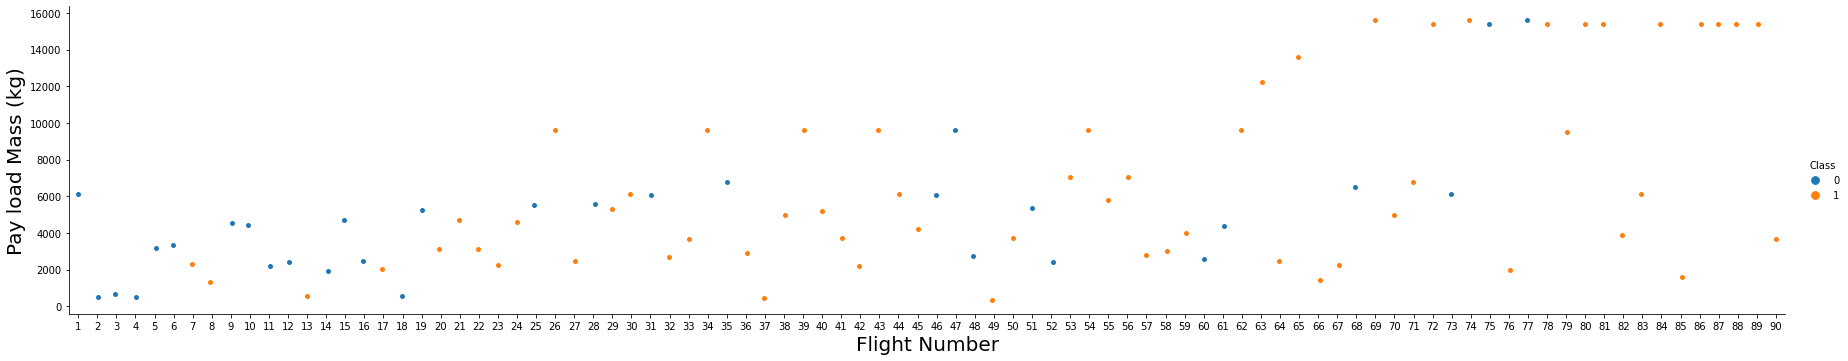

In [105]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.


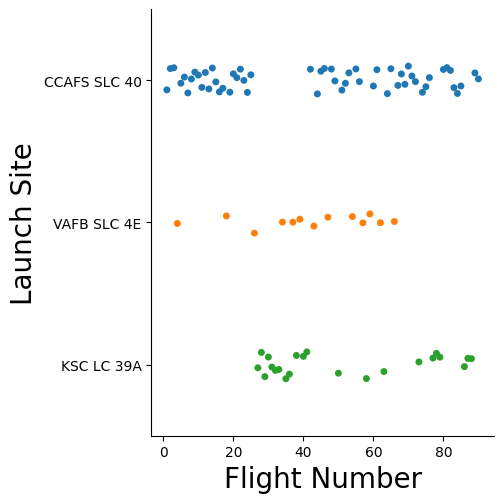

In [109]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

sns.catplot(y="LaunchSite", x="FlightNumber", data=df,)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


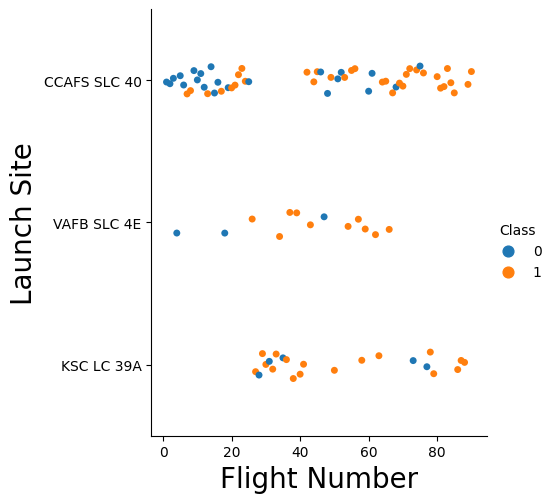

In [110]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", data=df, hue="Class")
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


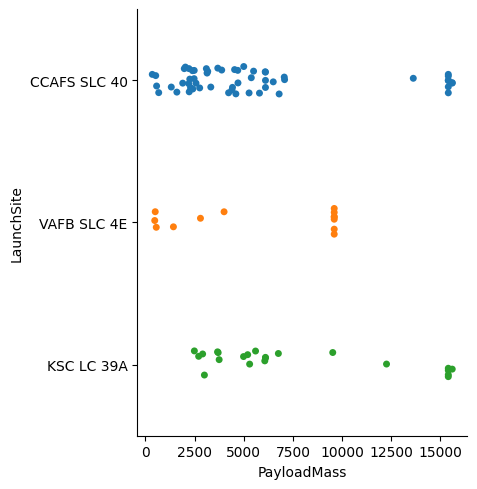

In [114]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", data=df,)

We also want to observe if there is any relationship between launch sites and their payload mass.


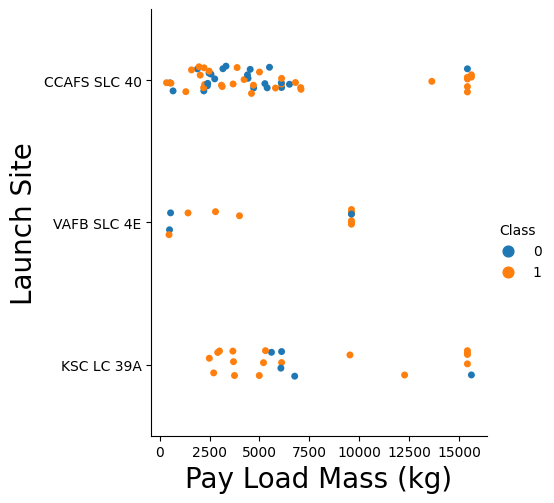

In [116]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", data=df, hue="Class")
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [ ]:
### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a `bar chart` for the sucess rate of each orbit


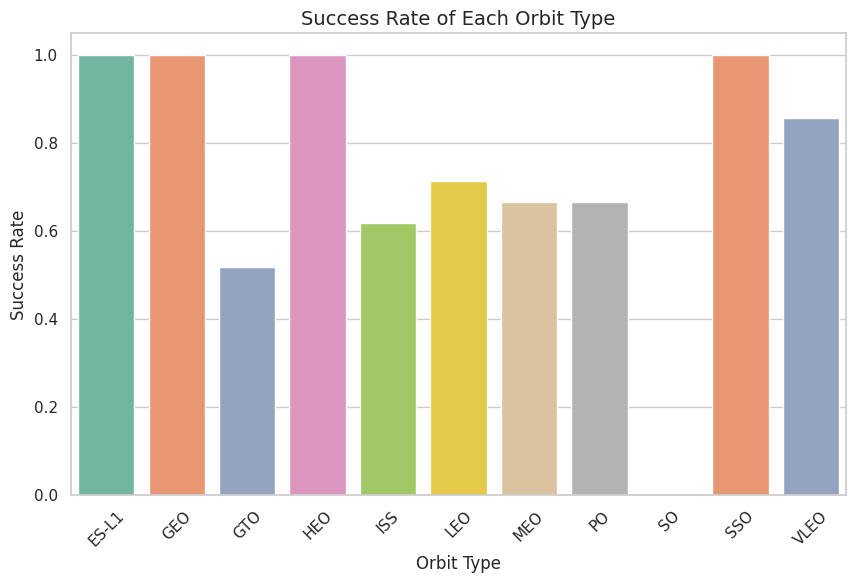

In [117]:
# HINT use groupby method on Orbit column and get the mean of Class column

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=orbit_success_rate, x="Orbit", y="Class", palette="Set2")

# Set the labels and title
plt.xlabel("Orbit Type", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.title("Success Rate of Each Orbit Type", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


<Figure size 1000x600 with 0 Axes>

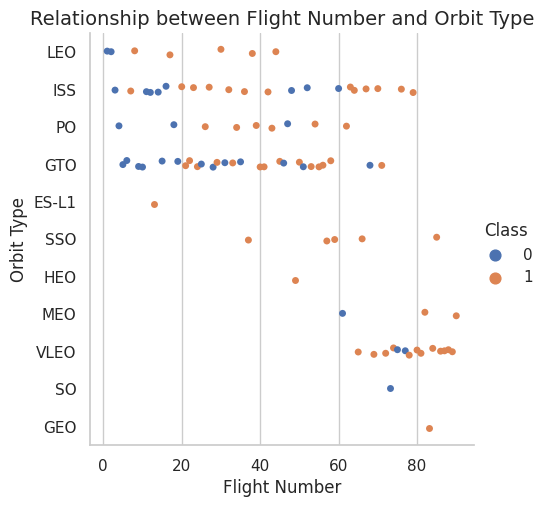

In [123]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="FlightNumber", y="Orbit", hue="Class")

# Set the labels and title
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=14)

# Show the plot
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK  5: Visualize the relationship between Payload and Orbit type
Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type
#### Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value


<Figure size 1200x800 with 0 Axes>

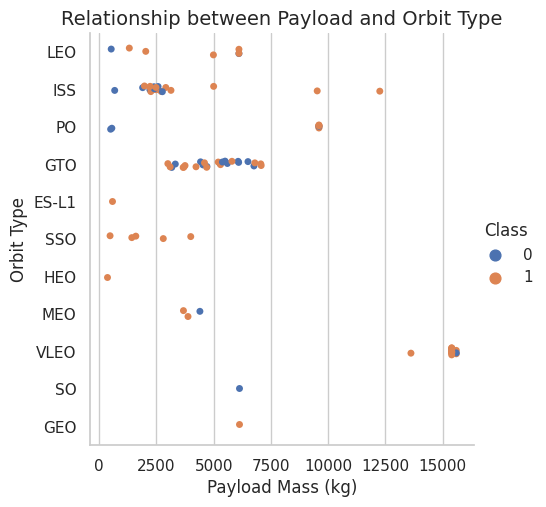

In [124]:
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x="PayloadMass", y="Orbit", hue="Class")

# Set the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.title("Relationship between Payload and Orbit Type", fontsize=14)

# Show the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend. The function will help you get the year from the date:

In [125]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


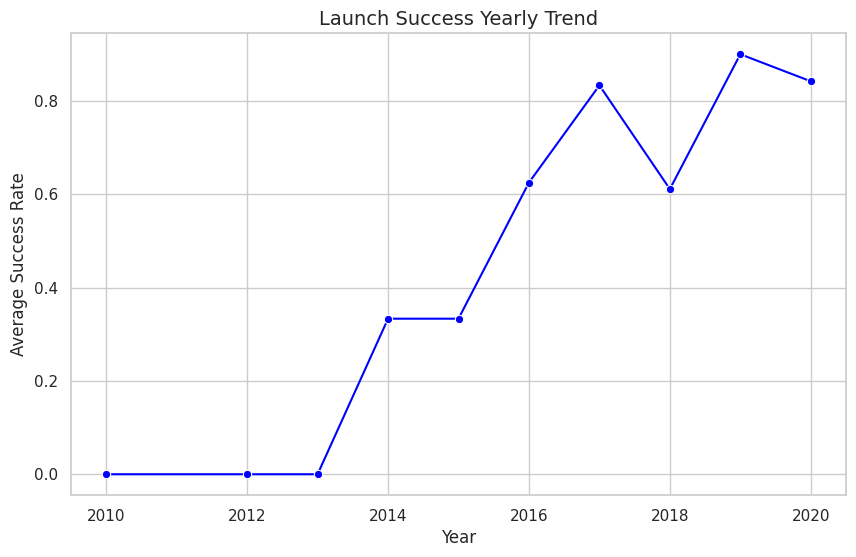

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# A function to Extract years from the date
def extract_year(date):
    return date.split("-")[0]

# Apply the function to extract the year from the Date column
df['Year'] = df['Date'].apply(extract_year)

# Convert Year column to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_success_rate, x="Year", y="Class", marker='o', color='blue')

# Set the labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Success Rate", fontsize=12)
plt.title("Launch Success Yearly Trend", fontsize=14)

# Show the plot
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [128]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [129]:
# HINT: Use get_dummies() function on the categorical columns
# Select the features to include in the prediction model
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Create dummy variables for categorical columns using get_dummies()
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the resulting dataframe including the encoded features
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`
Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [130]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype(float)

# Display the resulting dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.
<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>
